# <center> Text Mining the #MeToo Movement (April 22 - 27, 2022) </center>

<center> by Yvette Vargas <center>
<center> Professor Sohair Zaki <center>
<center> CISD43: Big Data Modeling & Analysis <center>
<center> May 8, 2022 <center>

### Objective of Project

Students will learn text mining and sentiment analysis through Twitter as part of the Big Data curriculum. For their projects, students must incorpoate the following: 

1. Create a Twitter developer account
2. Collect tweets (for whatever topic interests them)  
3. Clean (for example take out url, change case sensitivity, get out stop words)
4. Filter the tweets
5. Perform some visualization to draw conclusions
6. Sentiment analysis
7. Conclusion

### Topic of Interest and Context

***#MeToo*** is a digital and social movement that allowed survivors of sexual assault, sexual harassment, and sexual bullying to bond and share their experiences while taking action against sexual abuse in general. Coined by activist, Tarana Burke, in 2006 on MySpace, #MeToo gained national and global attraction in 2017 when the New York Times accused Hollywood producer, Harvey Weinstein, of rape and sexual assault and was later found guility. As the first high-profiled individual who has been succesfully convicted and later allowed other high profiled individuals to be held accountable, this global phenomenon sparked an ongoing conversation surounding public safety, accountabilty, and other variables that part-take in the handling of sexual abuse and sex crimes. 

Despite the positive support of this movement and the need for changes to happen, there has been social conflicts. Aside from the misogyny, one particular component that has caused controversy is the notion of whether males can be sexually abused and contribute to the discussion. 

Interestingly enough, (as you will see in this project), two incidents have occurred in relation to this: 
1.  the 2022 Oscars where Will Smith slaps Chris Rock after making a joke revolving around Smith's wife, Jada Pinkett Smith, on her battle with allopecia (March 27, 2022) 
2. the case trial with actor Johnny Depp and his ex-wife, actress Amber Heard, where Depp is suing Heard for defamation because of an op-ed she published in the Washington Post in 2018 claiming that Depp has been physically abusive and violent towards her. In addition, both are acusing of each other for domestic abuse (April 11 - present) 

***Note: By the time this project is submitted, the Depp vs. Heard case is scheduled to end on May 27, 2022. New events can shift the results of this project.***

**Sources:**

- Sean Blackburn, "What is the #MeToo Movement?", Website: verywellmind, Published: April 24, 2022, Accessed: April 25, 2022: https://www.verywellmind.com/what-is-the-metoo-movement-4774817
- Joan M. Cook (PhD) and Amy E. Ellis (PhD), "The Other #MeToo: Male Sexual Abuse Survivors", Website: Psychriatic Times, Vol 37, Issue 4, Volume 37, Issue 4, Published: April 2, 2020, Accessed: May 6, 2022 : https://www.psychiatrictimes.com/view/other-me-too-male-sexual-abuse-survivors
- Emily Stedman, "Why did Will Smith slap Chris Rock? THAT Oscars 2022 moment explained", Website: Good to Know, Published: March 31, 2022, Accessed: April 28, 2022: https://www.goodto.com/entertainment/entertainment-news/why-will-smith-slap-chris-rock-658245
- Constance Grady, "Johnny Depp, Amber Heard, and their $50 million defamation suit, explained", Website: Vox News, Published: May 4, 2022, Accessed: May 6, 2022: https://www.vox.com/culture/23043519/johnny-depp-amber-heard-defamation-trial-fairfax-county-domestic-abuse-violence-me-too

### Purpose and Research Questions:

With these recent events, I investigate the current digital conversation surrounding the #MeToo movement to get a sense of where and what the current conversation is. 

**Disclaimer**: given the scope of this movement and the resources that are readily provided for me as a student, there are some limitations that should be addressed: 
* It would be ideal to track the progression of the movement since 2006 or from 2017; however, given that this movement is global, it would be impossbile to do and there is a set number of tweets that one can collect. 
* I am restricting my scope to just the United States from April 22 - 27 2022
* As a student who is familiarizing with Data Science, I plan to keep the project as simplistic as possible. 

**Research Questions**
1. What where the most common words used in the tweets using #MeToo between April 22-27, 2022?
2. What were the sources used for sending the tweets during the given time period?
3. What are the sentiment scores of the tweets during the time period?
4. What can we infer about the current conversation?
5. If there is any missing information needed to add onto the project? 

# I) Collection of Tweets 

**Authorizing an Application to Access Twitter Account Data and Import Important Libraries**

In [1]:
#import os to deal with files on the operating system
import os

#import pandas to deal with dataframes and more
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#import collections to deal with collections
import collections

#import tweepy to deal with the tweets
import tweepy as tweepy
from tweepy import Stream
from tweepy.auth import OAuthHandler
#import Credentials

#import nltk to deal with natural processing language
#we will study that in details in our Natural Processing course in AI for Business certificate
import nltk
from nltk.corpus import stopwords
import re
import networkx

#Import textblob
from textblob import TextBlob

#to filter warnings
import warnings
warnings.filterwarnings("ignore")

#setting some configurations for seaborn related plots
#setting the background style and font scale 
#those are optional but makes the plots look nicer
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


**Required Keys and Tokens**


In [2]:
#required keys and tokens

# Identify keys and tokens
access_token = '1516850204292526080-LAeSsJ4wVSPPREK0VCZKa0sNjngEjN'
access_secret = 'vrfoi7kkFwntlPkoaolxuccmJU9nnBwDqOA0CsetzumUK'


consumer_key = 'dnZJ0nONNrLf148YoCSjRAc8w'
consumer_secret = 'gOR0ws6HI9mkPo3keWbP621iv3Rz93TNRW8eh6LLJPdNxWP1oD'

#Set keys and tokens 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
#Authorize Twitter API
twitter_api = tweepy.API(auth)
(auth, wait_on_rate_limit=True)

SyntaxError: invalid syntax (Temp/ipykernel_3744/2560416773.py, line 17)

In [ ]:
# Define the search term and the date_since date as variables
#Filtering out retweets
#Focusing on #metoo

search_words = "#metoo -filter:retweets"
date_since = "2022-04-22"
#will be doing dataes April 22-27 (one week observation)

#.items(100) will return 100 of the most recent tweets.

# Collect tweets
tweets = tweepy.Cursor(twitter_api.search_tweets, 
                       q = search_words, 
                       lang="en",
                       until=date_since).items(100)
tweets

#storing all_tweets_text
all_tweets_text = [[tweet.text, tweet.created_at, tweet.source, tweet.user.location] for tweet in tweets]

#Create all_tweets_time
#all_tweets_time = [tweet.created_at for tweet in tweets]

#Create all_tweets_source
#all_tweets_source = [tweet.source for tweet in tweets]

#Create all_tweets_loc
#all_tweets_loc = [tweet.user.location for tweet in tweets]
df1 = pd.DataFrame(data=all_tweets_text,columns=['text','time','source','location'])

In [ ]:
df1.to_csv('data_tweet/metoo0423')
#used this function to create csv files for April 22-27
#typo: meant to type metoo0422 instead of metoo0423 
#Note: csv files metoo0423-0428 = April 22-27, 2022

# II) Clean and Filter the Tweets

In [3]:
#Read files 
df1 = pd.read_csv('data_tweet/metoo0423')
df2 = pd.read_csv('data_tweet/metoo0424')
df3 = pd.read_csv('data_tweet/metoo0425')
df4 = pd.read_csv('data_tweet/metoo0426')
df5 = pd.read_csv('data_tweet/metoo0427')
df6 = pd.read_csv('data_tweet/metoo0428')

#Create frame variable with all csv files
frames = [df1, df2, df3, df4, df5, df6]

#Concatinate Dataframes
metooframe = pd.concat(frames)

#Display frame
metooframe

,Unnamed: 0,text,time,source,location
0,0,"@SOMA_92_T @bearlikesmango Yes, we were talkin...",2022-04-22 23:57:21+00:00,Twitter for Android,Galaxy GN-z11
1,1,@LuisCunhaLucas But they're not saying #metoo ...,2022-04-22 23:49:17+00:00,Twitter for Android,NaN
2,2,This is the party of #Metoo https://t.co/P6hSL...,2022-04-22 23:49:00+00:00,Twitter for iPhone,"Oklahoma, USA"
3,3,@biconicwomann Not ANY woman. Someone that cla...,2022-04-22 23:38:04+00:00,Twitter for Android,"Espinho, Portugal"
4,4,I’m asking the news media. @nytimes @washingto...,2022-04-22 23:37:43+00:00,Twitter for iPhone,𝚕𝚊 𝚌𝚊𝚕𝚒𝚏𝚞𝚜𝚊
...,...,...,...,...,...
95,95,Everyone wants #PeterObi for president #MeToo,2022-04-27 21:37:00+00:00,Twitter for Android,Gulf of Guinea
96,96,Eyes speak words that a mouth can’t.\nYrs we c...,2022-04-27 21:31:22+00:00,Twitter for iPad,"England, United Kingdom"
97,97,LATIN AMERICA: 50% of the women aged 15 to 25 ...,2022-04-27 21:30:00+00:00,TweetDeck,We are global!
98,98,Albright was laid to rest today. Sharp intelle...,2022-04-27 21:27:46+00:00,Twitter Web App,NaN


In [4]:
#drop additional index 
metooframe.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
#display frame
metooframe

,text,time,source,location
0,"@SOMA_92_T @bearlikesmango Yes, we were talkin...",2022-04-22 23:57:21+00:00,Twitter for Android,Galaxy GN-z11
1,@LuisCunhaLucas But they're not saying #metoo ...,2022-04-22 23:49:17+00:00,Twitter for Android,NaN
2,This is the party of #Metoo https://t.co/P6hSL...,2022-04-22 23:49:00+00:00,Twitter for iPhone,"Oklahoma, USA"
3,@biconicwomann Not ANY woman. Someone that cla...,2022-04-22 23:38:04+00:00,Twitter for Android,"Espinho, Portugal"
4,I’m asking the news media. @nytimes @washingto...,2022-04-22 23:37:43+00:00,Twitter for iPhone,𝚕𝚊 𝚌𝚊𝚕𝚒𝚏𝚞𝚜𝚊
...,...,...,...,...
95,Everyone wants #PeterObi for president #MeToo,2022-04-27 21:37:00+00:00,Twitter for Android,Gulf of Guinea
96,Eyes speak words that a mouth can’t.\nYrs we c...,2022-04-27 21:31:22+00:00,Twitter for iPad,"England, United Kingdom"
97,LATIN AMERICA: 50% of the women aged 15 to 25 ...,2022-04-27 21:30:00+00:00,TweetDeck,We are global!
98,Albright was laid to rest today. Sharp intelle...,2022-04-27 21:27:46+00:00,Twitter Web App,NaN


In [6]:
#let's clean out any url,hastags, and @ symbols in the tweets 

# remove url
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#remove hashtag #
def remove_hashtag(txt):
    return " ".join(re.sub("([#＃]+)([0-9A-Z_]*[A-Z_]+[a-z0-9_üÀ-ÖØ-öø-ÿ]*)", "", txt).split())

# remove mention @
def remove_at(txt):
    return " ".join(re.sub("(\@[a-zA-Z0-9_%]*)", "", txt).split())

In [7]:
#apply remove_hashtag function to frame
metooframe.text = metooframe.text.apply(remove_hashtag)

#display head
metooframe.head()

,text,time,source,location
0,"@SOMA_92_T @bearlikesmango Yes, we were talkin...",2022-04-22 23:57:21+00:00,Twitter for Android,Galaxy GN-z11
1,@LuisCunhaLucas But they're not saying #metoo ...,2022-04-22 23:49:17+00:00,Twitter for Android,NaN
2,This is the party of https://t.co/P6hSLpUsSA,2022-04-22 23:49:00+00:00,Twitter for iPhone,"Oklahoma, USA"
3,@biconicwomann Not ANY woman. Someone that cla...,2022-04-22 23:38:04+00:00,Twitter for Android,"Espinho, Portugal"
4,I’m asking the news media. @nytimes @washingto...,2022-04-22 23:37:43+00:00,Twitter for iPhone,𝚕𝚊 𝚌𝚊𝚕𝚒𝚏𝚞𝚜𝚊


In [8]:
#apply remove_at function to frame
metooframe.text = metooframe.text.apply(remove_at)

#display head
metooframe.head()

,text,time,source,location
0,"Yes, we were talking abt Too movement in Japan...",2022-04-22 23:57:21+00:00,Twitter for Android,Galaxy GN-z11
1,But they're not saying #metoo They're saying #...,2022-04-22 23:49:17+00:00,Twitter for Android,NaN
2,This is the party of https://t.co/P6hSLpUsSA,2022-04-22 23:49:00+00:00,Twitter for iPhone,"Oklahoma, USA"
3,"Not ANY woman. Someone that claims, and by far...",2022-04-22 23:38:04+00:00,Twitter for Android,"Espinho, Portugal"
4,I’m asking the news media. … https://t.co/v2ya...,2022-04-22 23:37:43+00:00,Twitter for iPhone,𝚕𝚊 𝚌𝚊𝚕𝚒𝚏𝚞𝚜𝚊


In [9]:
#apply remove_url function to frame
metooframe.text = metooframe.text.apply(remove_url)

#display head
metooframe.head()

,text,time,source,location
0,Yes we were talking abt Too movement in Japan ...,2022-04-22 23:57:21+00:00,Twitter for Android,Galaxy GN-z11
1,But theyre not saying metoo Theyre saying mepo...,2022-04-22 23:49:17+00:00,Twitter for Android,NaN
2,This is the party of,2022-04-22 23:49:00+00:00,Twitter for iPhone,"Oklahoma, USA"
3,Not ANY woman Someone that claims and by far d...,2022-04-22 23:38:04+00:00,Twitter for Android,"Espinho, Portugal"
4,Im asking the news media,2022-04-22 23:37:43+00:00,Twitter for iPhone,𝚕𝚊 𝚌𝚊𝚕𝚒𝚏𝚞𝚜𝚊


In [10]:
#let's see our unique values in locations
metooframe['location'].unique()

#It is quite varied from straightforward locations to made up ones

array(['Galaxy GN-z11 ', nan, 'Oklahoma, USA', 'Espinho, Portugal',
       '𝚕𝚊 𝚌𝚊𝚕𝚒𝚏𝚞𝚜𝚊', '🌎', 'Not New Orleans ',
       'South Chicago Heights, IL', 'Los Angeles, CA', 'Universe',
       'Somewhere Else', 'All major cities worldwide',
       'Amsterdam NY, Portland ME', 'Indianapolis, IN', 'New York City',
       'Pittsburgh, PA', 'Lehigh University', 'UK', 'United States',
       "Provence Alpes-Cote d'Azur ", 'Portland, Oregon', 'Bitcoin',
       'Sellersville, Pennsylvania', 'Arizona, USA',
       'Bristol, United Kingdom 🇬🇧', 'Moon Order, Zion, Trailokya',
       'London, United Kingdom', 'AMERICAS', 'Tucson, AZ', 'NB, Canada',
       'the last magic realm', 'Detroit', 'Phobos', 'Minneapolis, MN',
       'Middle Earth', 'Cloud', 'San Francisco', 'Surrey, UK', 'Chicago ',
       'Portland', 'Currently in Texas', 'Uranus', 'London',
       'southern coastal environs', 'By the beautiful Hudson River.',
       '1 mile from the Pacific', 'South Carolina', 'blacksburg',
       'LOS ANG

In [11]:
#upon further reflection, it seems that this information would not help me answer or get further insight for the project
#drop location column
metooframe.drop(['location'], axis = 1, inplace = True)

In [12]:
#Display frame
metooframe

,text,time,source
0,Yes we were talking abt Too movement in Japan ...,2022-04-22 23:57:21+00:00,Twitter for Android
1,But theyre not saying metoo Theyre saying mepo...,2022-04-22 23:49:17+00:00,Twitter for Android
2,This is the party of,2022-04-22 23:49:00+00:00,Twitter for iPhone
3,Not ANY woman Someone that claims and by far d...,2022-04-22 23:38:04+00:00,Twitter for Android
4,Im asking the news media,2022-04-22 23:37:43+00:00,Twitter for iPhone
...,...,...,...
95,Everyone wants Obi for president Too,2022-04-27 21:37:00+00:00,Twitter for Android
96,Eyes speak words that a mouth cant Yrs we coul...,2022-04-27 21:31:22+00:00,Twitter for iPad
97,LATIN AMERICA 50 of the women aged 15 to 25 po...,2022-04-27 21:30:00+00:00,TweetDeck
98,Albright was laid to rest today Sharp intellec...,2022-04-27 21:27:46+00:00,Twitter Web App


In [13]:
#For time, we only want the date since we want to see a daily documentation

#create function sliceTime
def sliceTime(x):
    x = x[0:10]
    return x
#will return only date

In [14]:
#apply sliceTime function to frame
metooframe.time = metooframe.time.apply(sliceTime)

In [15]:
#display head
metooframe.head()

,text,time,source
0,Yes we were talking abt Too movement in Japan ...,2022-04-22,Twitter for Android
1,But theyre not saying metoo Theyre saying mepo...,2022-04-22,Twitter for Android
2,This is the party of,2022-04-22,Twitter for iPhone
3,Not ANY woman Someone that claims and by far d...,2022-04-22,Twitter for Android
4,Im asking the news media,2022-04-22,Twitter for iPhone


In [16]:
#now let's begin to ufilter out our words and seperate the stop words

#lower case tweets
metooframe.text = metooframe['text'].str.lower()

In [17]:
#display frame
metooframe

,text,time,source
0,yes we were talking abt too movement in japan ...,2022-04-22,Twitter for Android
1,but theyre not saying metoo theyre saying mepo...,2022-04-22,Twitter for Android
2,this is the party of,2022-04-22,Twitter for iPhone
3,not any woman someone that claims and by far d...,2022-04-22,Twitter for Android
4,im asking the news media,2022-04-22,Twitter for iPhone
...,...,...,...
95,everyone wants obi for president too,2022-04-27,Twitter for Android
96,eyes speak words that a mouth cant yrs we coul...,2022-04-27,Twitter for iPad
97,latin america 50 of the women aged 15 to 25 po...,2022-04-27,TweetDeck
98,albright was laid to rest today sharp intellec...,2022-04-27,Twitter Web App


In [18]:
#split words into unique elements
words_in_tweet = [tweet.lower().split() for tweet in metooframe.text]

#display frame
words_in_tweet

#if you look closely, you will see that many tweets revolved around the Depp v. Heard case

[['yes',
  'we',
  'were',
  'talking',
  'abt',
  'too',
  'movement',
  'in',
  'japan',
  'so',
  'lets',
  'focus',
  'on',
  'it',
  'johnny',
  'depp',
  'amp',
  'h'],
 ['but',
  'theyre',
  'not',
  'saying',
  'metoo',
  'theyre',
  'saying',
  'mepoo',
  'which',
  'is',
  'a',
  'direct',
  'reference',
  'to',
  'the',
  'movement'],
 ['this', 'is', 'the', 'party', 'of'],
 ['not',
  'any',
  'woman',
  'someone',
  'that',
  'claims',
  'and',
  'by',
  'far',
  'disregard',
  'the',
  'real',
  'victims',
  'and',
  'survivors',
  'been',
  'abused'],
 ['im', 'asking', 'the', 'news', 'media'],
 ['but',
  'the',
  'too',
  'movement',
  'can',
  'profit',
  'off',
  'of',
  'fake',
  'abuse',
  'claimsyeah',
  'id',
  'rather',
  'buy',
  'makeup',
  'forjohnnydepp'],
 ['quite',
  'fitting',
  'since',
  'she',
  'made',
  'these',
  'allegations',
  'at',
  'the',
  'height',
  'of',
  'the',
  'too',
  'movement',
  'and',
  'theres',
  'au'],
 ['when',
  'i',
  'type',
 

In [19]:
#import nltk to help seperate stop words in tweets
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yvette\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
#set stop words to english
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]


['most',
 "mightn't",
 'you',
 'why',
 "you'll",
 'about',
 'mightn',
 'while',
 'wasn',
 'into']

In [21]:
# List of all words across tweets
all_words = list(itertools.chain(*words_in_tweet))

# Create counter
word_counts_tweets = collections.Counter(all_words)

#See the most common 15 stop words in collected tweets from csv files
word_counts_tweets.most_common(15)

#even though we can perform analysis on this, this information would not be helpful

[('the', 348),
 ('too', 243),
 ('to', 191),
 ('of', 182),
 ('a', 171),
 ('is', 137),
 ('and', 130),
 ('i', 126),
 ('in', 117),
 ('metoo', 112),
 ('that', 92),
 ('you', 89),
 ('for', 89),
 ('this', 72),
 ('it', 70)]

In [22]:
#We have seperated the stop words from our tweets
#lets create a function to collect other words in text 
all_words_nsw = []
for a in all_words:
    if a not in stop_words:
        all_words_nsw.append(a)

#display the other words 
all_words_nsw

#notice how Depp v. Heard case is mentioned 

['yes',
 'talking',
 'abt',
 'movement',
 'japan',
 'lets',
 'focus',
 'johnny',
 'depp',
 'amp',
 'h',
 'theyre',
 'saying',
 'metoo',
 'theyre',
 'saying',
 'mepoo',
 'direct',
 'reference',
 'movement',
 'party',
 'woman',
 'someone',
 'claims',
 'far',
 'disregard',
 'real',
 'victims',
 'survivors',
 'abused',
 'im',
 'asking',
 'news',
 'media',
 'movement',
 'profit',
 'fake',
 'abuse',
 'claimsyeah',
 'id',
 'rather',
 'buy',
 'makeup',
 'forjohnnydepp',
 'quite',
 'fitting',
 'since',
 'made',
 'allegations',
 'height',
 'movement',
 'theres',
 'au',
 'type',
 'wtf',
 'little',
 'emoji',
 'im',
 'even',
 'talking',
 'sexual',
 'assault',
 'man',
 'fuck',
 'metoo',
 'im',
 'tryna',
 'catch',
 'fix',
 'post',
 'depp',
 'metoo',
 'heardisaliar',
 'boycott',
 'bros',
 'lostkingdom',
 'forjohnnydepp',
 'believe',
 'women',
 'would',
 'makeup',
 'brand',
 'deposed',
 'take',
 'upon',
 'trivialize',
 'court',
 'proceedings',
 'pertain',
 'suspect',
 'right',
 'think',
 'leverage',
 '

In [23]:
# Create counter for the words from the stop words
wordnsw_counts_tweets = collections.Counter(all_words_nsw)

#show the most common words - top 20
wordnsw_counts_tweets.most_common(20)

[('metoo', 112),
 ('movement', 68),
 ('amber', 48),
 ('women', 45),
 ('heard', 44),
 ('depp', 40),
 ('amp', 34),
 ('im', 33),
 ('like', 30),
 ('people', 29),
 ('sexual', 28),
 ('johnny', 27),
 ('men', 25),
 ('abuse', 23),
 ('victims', 22),
 ('woman', 21),
 ('dont', 20),
 ('media', 19),
 ('years', 17),
 ('one', 15)]

In [24]:
#create a dataframe for the non-stop words
clean_tweets = pd.DataFrame(wordnsw_counts_tweets.most_common(20),
                             columns=['words', 'count'])

#show head
clean_tweets.head(15)

#This is interesting. for the top 15 during this time period
#"men", "absue", and  "victims" made it into the conversation 

,words,count
0,metoo,112
1,movement,68
2,amber,48
3,women,45
4,heard,44
5,depp,40
6,amp,34
7,im,33
8,like,30
9,people,29


Cleaning for text is done. Now, let's move on with our sources

In [25]:
#Refresh mind

#show main dataframe
metooframe

,text,time,source
0,yes we were talking abt too movement in japan ...,2022-04-22,Twitter for Android
1,but theyre not saying metoo theyre saying mepo...,2022-04-22,Twitter for Android
2,this is the party of,2022-04-22,Twitter for iPhone
3,not any woman someone that claims and by far d...,2022-04-22,Twitter for Android
4,im asking the news media,2022-04-22,Twitter for iPhone
...,...,...,...
95,everyone wants obi for president too,2022-04-27,Twitter for Android
96,eyes speak words that a mouth cant yrs we coul...,2022-04-27,Twitter for iPad
97,latin america 50 of the women aged 15 to 25 po...,2022-04-27,TweetDeck
98,albright was laid to rest today sharp intellec...,2022-04-27,Twitter Web App


In [26]:
#Now, let's see our sources
df2 = pd.DataFrame(metooframe["source"])

#display frame
df2

,source
0,Twitter for Android
1,Twitter for Android
2,Twitter for iPhone
3,Twitter for Android
4,Twitter for iPhone
...,...
95,Twitter for Android
96,Twitter for iPad
97,TweetDeck
98,Twitter Web App


In [27]:
#let's see the value counts of the sources
source_counts = pd.DataFrame(metooframe["source"]).value_counts()

#display result
source_counts

#there are several sources that are not the traditional sources one would see

source                   
Twitter Web App              217
Twitter for iPhone           187
Twitter for Android          125
Twitter for iPad              26
SocialOomph                    5
Buffer                         5
Tumblr                         5
The Social Jukebox             3
Hootsuite Inc.                 2
Poshmark                       2
TweetDeck                      2
erased24106336_9MZF0arGAy      1
dlvr.it                        1
custom-twitter-bot             1
Zoho Social                    1
Twitterrific for iOS           1
247MotivationalQuotes          1
Tweetlogix                     1
SocialFlow                     1
Revive Social App              1
PromoRepublic                  1
Post Planner Inc.              1
Paper.li                       1
Instagram                      1
Echobox                        1
Down Right Bot                 1
recurpost.com                  1
dtype: int64

In [28]:
#displaying the source counts as it is would not be ideal (or helpful)
#let's create a function where we can categorize our results 

#Define convert_source
def convert_source (x):
    if x == "Twitter Web App":
        return "Twitter Web App"
    elif x == "Twitter for iPhone":
        return x
    elif x == "Twitter for Android":
        return x
    elif x == "Twitter for iPad":
        return x
    else: 
        return "Others"
    
#anything that is not from the app for iPhone, Android, web application, or iPad will be considered "Others" 

In [29]:
#apply convert_source to main dataframe
metooframe['sourceConvert']=df1["source"].apply(lambda x :convert_source(str(x)))

#display dataframe
metooframe

#notice Null Values, will be handled later in project (stay tuned!)

,text,time,source,sourceConvert
0,yes we were talking abt too movement in japan ...,2022-04-22,Twitter for Android,Twitter for Android
1,but theyre not saying metoo theyre saying mepo...,2022-04-22,Twitter for Android,Twitter for Android
2,this is the party of,2022-04-22,Twitter for iPhone,Twitter for iPhone
3,not any woman someone that claims and by far d...,2022-04-22,Twitter for Android,Twitter for Android
4,im asking the news media,2022-04-22,Twitter for iPhone,Twitter for iPhone
...,...,...,...,...
95,everyone wants obi for president too,2022-04-27,Twitter for Android,NaN
96,eyes speak words that a mouth cant yrs we coul...,2022-04-27,Twitter for iPad,NaN
97,latin america 50 of the women aged 15 to 25 po...,2022-04-27,TweetDeck,NaN
98,albright was laid to rest today sharp intellec...,2022-04-27,Twitter Web App,NaN


In [30]:
#Since we have converted our sources, we can now drop the "source" column

#drop "source" column
metooframe.drop('source', axis=1, inplace=True)

In [31]:
#display main table
metooframe

,text,time,sourceConvert
0,yes we were talking abt too movement in japan ...,2022-04-22,Twitter for Android
1,but theyre not saying metoo theyre saying mepo...,2022-04-22,Twitter for Android
2,this is the party of,2022-04-22,Twitter for iPhone
3,not any woman someone that claims and by far d...,2022-04-22,Twitter for Android
4,im asking the news media,2022-04-22,Twitter for iPhone
...,...,...,...
95,everyone wants obi for president too,2022-04-27,NaN
96,eyes speak words that a mouth cant yrs we coul...,2022-04-27,NaN
97,latin america 50 of the women aged 15 to 25 po...,2022-04-27,NaN
98,albright was laid to rest today sharp intellec...,2022-04-27,NaN


In [32]:
#Recall that we have null values in our dataframe
#Plus we want to reset our index and get the sourceConvert value counts

#drop null values
df4 = metooframe.dropna()

#get the sourceConvert value counts 
df4 = pd.DataFrame(df4.sourceConvert.value_counts())

#reset index
df5 = df4.reset_index()

#diplay results 
df5

,index,sourceConvert
0,Twitter for iPhone,216
1,Twitter Web App,156
2,Twitter for Android,120
3,Others,54
4,Twitter for iPad,24


# III) Visualization 

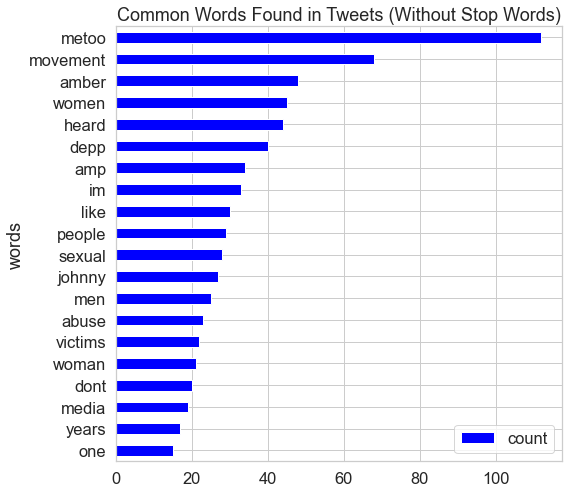

In [33]:
#Insert function for creating graph
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

#Create title for graph
ax.set_title("Common Words Found in Tweets (Without Stop Words)")

#Show graph
plt.show()

**1. What where the most common words used in the tweets using #MeToo between April 22-27, 2022?**

It is not a suprise that "metoo" and "movement" are the top two words found in the tweets. However, what I find interesting is not only mentioning Amber Heard and Johnny Depp but words "men", "abuse", and "victims" have made the top 15. It could be possible that there might be a shift in the discussion of sexual abuse involving men.  


([<matplotlib.patches.Wedge at 0x1dba53f8730>,
 [Text(0.4083169456239889, 1.0214094536062885, 'Twitter for iPhone'),
  Text(-1.0945911891487556, -0.1089501199536438, 'Twitter Web App'),
  Text(0.05454214854756357, -1.098646965149322, 'Twitter for Android'),
  Text(0.9307047944209487, -0.5863348750005067, 'Others'),
  Text(1.0903904822292625, -0.145081343610529, 'Twitter for iPad')],
 [Text(0.22271833397672122, 0.5571324292397937, '37.89'),
  Text(-0.5970497395356847, -0.05942733815653298, '27.37'),
  Text(0.02975026284412558, -0.5992619809905393, '21.05'),
  Text(0.5076571605932446, -0.3198190227275491, '9.47'),
  Text(0.594758444852325, -0.07913527833301581, '4.21')])

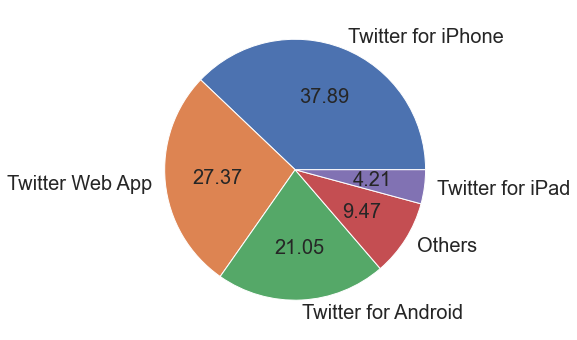

In [34]:
#insert graph function 
plt.figure(figsize = (6,6))

#create and show pie chart for sources
plt.pie(df5.sourceConvert, labels = df5["index"],autopct='%.2f',textprops= {"fontsize":20})

**2. What were the sources used for sending the tweets during the given time period?**

With nearly 38%, the tweets collected from April 22-27 2022 were posted from an iPhone Twitter App. Suprisingly, about 27% came from a Twiiter Web app followed by Twiiter Android application. 


# IV) Sentiment Analysis

In [35]:
#In order to conduct our sentiment analysis, we need to create a function for it 

#Define sentiment analysis 
def sentiment_analysis(tweet):
    #Define Subjectivity 
    def getSubjectivity(text):
        #return both sentiment and subjectivity 
        return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
    tweet['TextBlob_Subjectivity'] =    tweet['tweet'].apply(getSubjectivity)
    tweet ['TextBlob_Polarity'] = tweet['tweet'].apply(getPolarity)
    def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'
    tweet ['TextBlob_Analysis'] = tweet  ['TextBlob_Polarity'].apply(getAnalysis)
    return tweet

In [36]:
#Create function to extract the tweets and conduct our analysis of them 

#Define get_analysis function
def get_analysis(tweet):
    p = TextBlob(tweet).sentiment.polarity
    if p < 0: 
        return 'Negative'
    elif p == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [37]:
#apply functions to sentiment score to text column and create column of scores
metooframe["sentimentscore"] = metooframe["text"].apply(get_analysis)

#Display frame
metooframe

,text,time,sourceConvert,sentimentscore
0,yes we were talking abt too movement in japan ...,2022-04-22,Twitter for Android,Neutral
1,but theyre not saying metoo theyre saying mepo...,2022-04-22,Twitter for Android,Positive
2,this is the party of,2022-04-22,Twitter for iPhone,Neutral
3,not any woman someone that claims and by far d...,2022-04-22,Twitter for Android,Positive
4,im asking the news media,2022-04-22,Twitter for iPhone,Neutral
...,...,...,...,...
95,everyone wants obi for president too,2022-04-27,NaN,Positive
96,eyes speak words that a mouth cant yrs we coul...,2022-04-27,NaN,Neutral
97,latin america 50 of the women aged 15 to 25 po...,2022-04-27,NaN,Positive
98,albright was laid to rest today sharp intellec...,2022-04-27,NaN,Positive


In [38]:
#get value count of sentiment score (overall)
metooframe["sentimentscore"].value_counts()

Neutral     292
Positive    205
Negative     98
Name: sentimentscore, dtype: int64

In [61]:
#get value count of sentimennt score for iPhone
df3 = metooframe[metooframe["sourceConvert"] == "Twitter for iPhone"]

#Display Results
df3["sentimentscore"].value_counts()


Neutral     107
Positive     77
Negative     32
Name: sentimentscore, dtype: int64

In [63]:
#get value count for sentiment score for Android
df3 = metooframe[metooframe["sourceConvert"] == "Twitter for Android"]

#display results
df3["sentimentscore"].value_counts()

Neutral     55
Positive    45
Negative    20
Name: sentimentscore, dtype: int64

In [65]:
#get value count for sentiment score for web application
df3 = metooframe[metooframe["sourceConvert"] == "Twitter Web App"]

#dispay results
df3["sentimentscore"].value_counts()

Neutral     76
Positive    57
Negative    23
Name: sentimentscore, dtype: int64

In [67]:
#get value count for sentiment score for iPad
df3 = metooframe[metooframe["sourceConvert"] == "Twitter for iPad"]

#display results
df3["sentimentscore"].value_counts()

Negative    9
Neutral     9
Positive    6
Name: sentimentscore, dtype: int64

In [69]:
#get value count for sentiment score for others
df3 = metooframe[metooframe["sourceConvert"] == "Others"]

#display results 
df3["sentimentscore"].value_counts()

Neutral     30
Positive    12
Negative    12
Name: sentimentscore, dtype: int64

Text(0.5, 1.0, 'Histogram of Total Sentiment Scores Per Source')

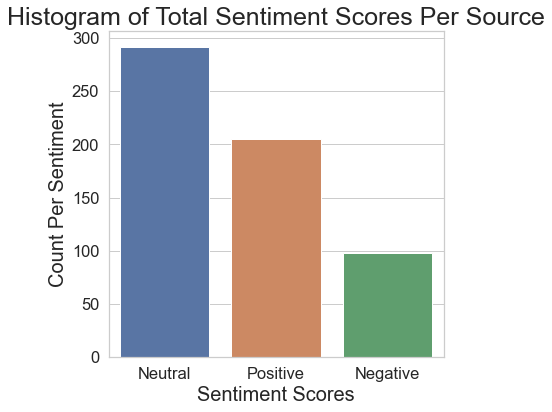

In [44]:
#Create figure size for histogram overall sentiment scores 
plt.figure(figsize=(6,6))
hist = sns.countplot(data=metooframe, x="sentimentscore")

#create titles for graph, x and y axis 
plt.xlabel("Sentiment Scores", fontsize = 20)
plt.ylabel("Count Per Sentiment", fontSize = 20)
plt.title("Histogram of Total Sentiment Scores Per Source", fontsize = 25)

Text(0.5, 1.0, 'Countplot for Twitter Sources')

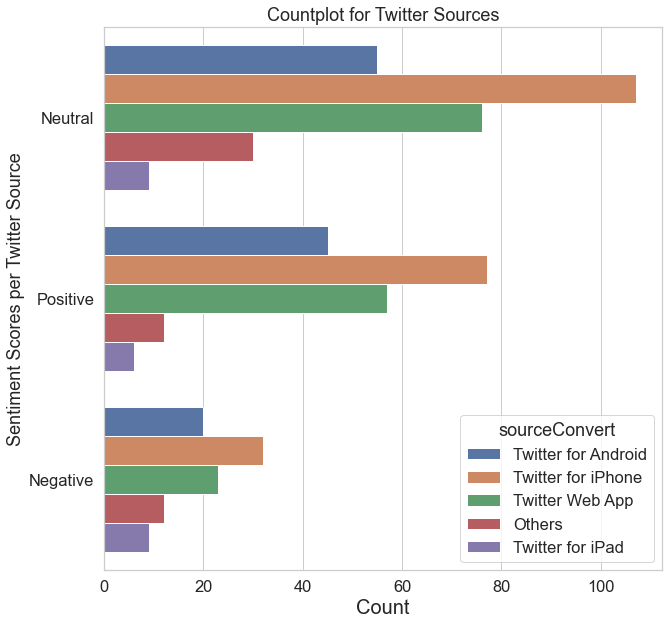

In [45]:
#create figure size for histogram sentiment score per source
plt.figure(figsize=(10, 10))
countplot = sns.countplot(data=metooframe, y="sentimentscore", hue = "sourceConvert")

#create titles for graph, x and y axis
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Sentiment Scores per Twitter Source")
plt.title("Countplot for Twitter Sources")

Text(0.5, 1.0, 'Histogram of Total Sentiment Scores During April 22-27, 2022')

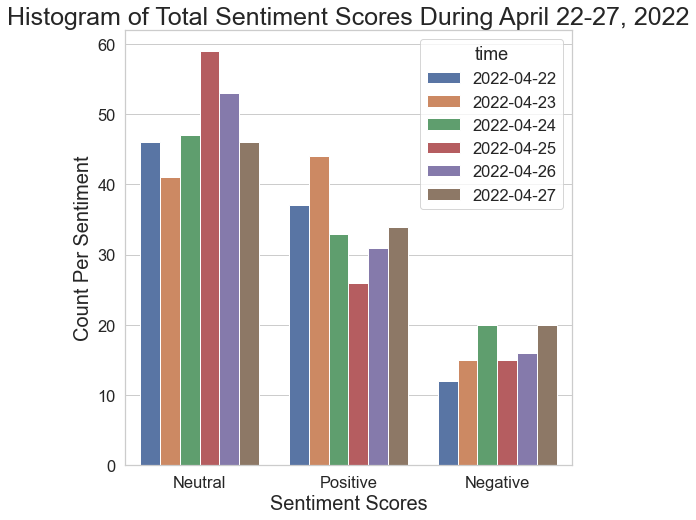

In [46]:
#create figure size for histogram sentiment score per day 
plt.figure(figsize=(8,8))
hist = sns.countplot(data=metooframe, x="sentimentscore", hue = "time")

#Create titles for graph, x and y axis 
plt.xlabel("Sentiment Scores", fontsize = 20)
plt.ylabel("Count Per Sentiment", fontSize = 20)
plt.title("Histogram of Total Sentiment Scores During April 22-27, 2022", fontsize = 25)

**3. What are the sentiment scores of the tweets during the time period?**

From what was gathered in the week of April 22-27 2022, the sentiments revolving around #MeToo is for the most part netural as positive sentiments ranks second. From further examination, we see that users with the iPad are split between being negative and netural. On the other hand,despite being the largest source group, we see that users with iPhones are more netural leaning compared to the other sources (and this goes for the other sentiment categories which they rank the highest among its group). Aside from this and iPad users of this sample, we see that the gap between netrual and positive interpretations are large (estimated 10-30 counts). The smallest gap is with Andriod users at a 10 count difference. 

If we analyze per day of the given period, one could make the argument of how it correlates to the progression of the Depp vs. Heard trial: 
- The highest peak of neutrality is April 25, 2022 which was the day that cross examinations happened where Depp was specifically questioned regarding the op-ed piece that Heard wrote and the lead-up to him suing her and most infamously, claims he is a vicitim of abuse. 
- As for April 23, 2022 (given that this was a Saturday), the trial continued on April 21, 2022. Continuing the cross examination, Depp makes his case that whether the trial is in favor of his position or not, his reputation is damaged because of Heard's actions and more so, even though he has presented that he never assaulted or harmed Heard, the perception of him is destroyed and ending his career. 
- For April 24 (Since it was a Sunday, the trail continued on the 25) and 26, Depp's psychologist is questioned and provocatively and informatively deliever her testimony as far as her findings on any disorders, abusive upbrings, and the faults of their relationship. 

Again, we cannot be too sure if this true given that the sample size is quite small and needs to be extended further than the scope that was conducted on. 

# V) Conclusions

**1. What where the most common words used in the tweets using #MeToo between April 22-27, 2022?**

It is not a suprise that "metoo" and "movement" are the top two words found in the tweets. However, what I find interesting is not only mentioning Amber Heard and Johnny Depp but words "men", "abuse", and "victims" have made the top 15. It could be possible that there might be a shift in the discussion of sexual abuse involving men. Or vice versa.  

**2. What were the sources used for sending the tweets during the given time period?**

With nearly 38%, the tweets collected from April 22-27 2022 were posted from an iPhone Twitter App. Suprisingly, about 27% came from a Twiiter Web app followed by Twiiter Android application. It is important to see who has access and how these tweets came to be. But, again, this is likely to shift if given a larger sample size. 

**3. What are the sentiment scores of the tweets during the time period?**

From what was gathered in the week of April 22-27 2022, the sentiments revolving around #MeToo is for the most part netural as positive sentiments ranks second. From further examination, we see that users with the iPad are split between being negative and netural. On the other hand,despite being the largest source group, we see that users with iPhones are more netural leaning compared to the other sources (and this goes for the other sentiment categories which they rank the highest among its group). Aside from this and iPad users of this sample, we see that the gap between netrual and positive interpretations are large (estimated 10-30 counts). The smallest gap is with Andriod users at a 10 count difference. 

If we analyze per day of the given period, one could make the argument of how it correlates to the progression of the Depp vs. Heard trial: 
- The highest peak of neutrality is April 25, 2022 which was the day that cross examinations happened where Depp was specifically questioned regarding the op-ed piece that Heard wrote and the lead-up to him suing her and most infamously, claims he is a vicitim of abuse. 
- As for April 23, 2022 (given that this was a Saturday), the trial continued on April 21, 2022. Continuing the cross examination, Depp makes his case that whether the trial is in favor of his position or not, his reputation is damaged because of Heard's actions and more so, even though he has presented that he never assaulted or harmed Heard, the perception of him is destroyed.
- For April 24 (since it was a Sunday, the trial continued on the 25) and 26, Depp's psychologist is questioned and delievers her testimony as far as her findings on any disorders, abusive upbrings, and the faults of their relationship in the most commanding fashion. 

Again, we cannot be too sure if this true given that the sample size is quite small and needs to be extended further than the scope that was conducted on. 

**4. What can we infer about the current conversation?**

At this point and the tools provided, we cannot make definitive statements regarding the movement in general. There could be multiple variables at hand that needs further investigation and/or a team effort to conduct a larger research project. 

With that said, however, if speaking upon just the sample I managed to collect, neturality for this movement is quite concerning to an extent and needs to be elaborated. Since the trial is the forefront of the movement as of now, there can be shifts along the way that can change my results. For me, the concern about neturality are the following: 1) the questioning of the approaches to assault allegations, 2) a hestitancy of engaging on toxic feminity, and 3) the perception of the trial and how it would most likley change the trajectory for cases of former assault victims. I can say for sure that the negative perception of the movement is minimal; therefore, it is likely that the public is leaning on making the changes necessary for assault victims to obtain safety and security. However, given the large perentage of neutrality from this sample, if not discussed, it could be a hinderance for this progress to be made and withdrawing any fruitful and educaitonal discussions. 

For now, it is too early to make conclusions. 

**5. If there is any missing information needed to add onto the project?**

It would be wise to continue documenting and sampling the tweets of the #MeToo movement until the trial is over and a final verdict is met. It would be helpful to have information regarding what percentage of women, males, and non-binary individuals are making the tweets and/or contributing to the discussion. State wise would be nice to have included for this project. 
